In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.index += 1
data.info()
print(f'Duplicated Records: {data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Duplicated Records: 0


In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data = data.drop(['PassengerId','Ticket','Name'], axis=1)

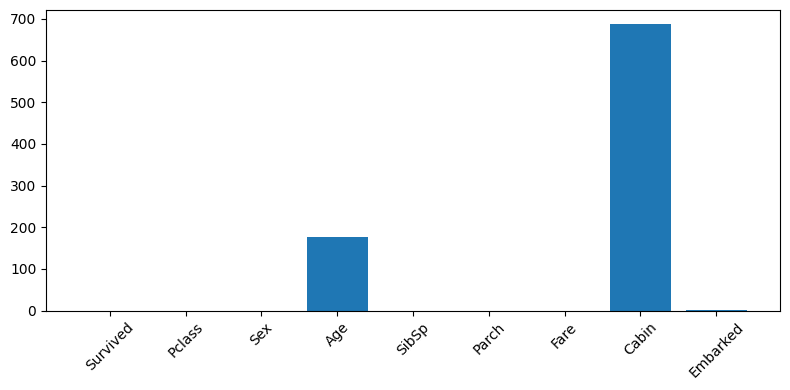

In [5]:
missing_values = data.isnull().sum()
plt.figure(figsize=(8, 4))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.tight_layout()

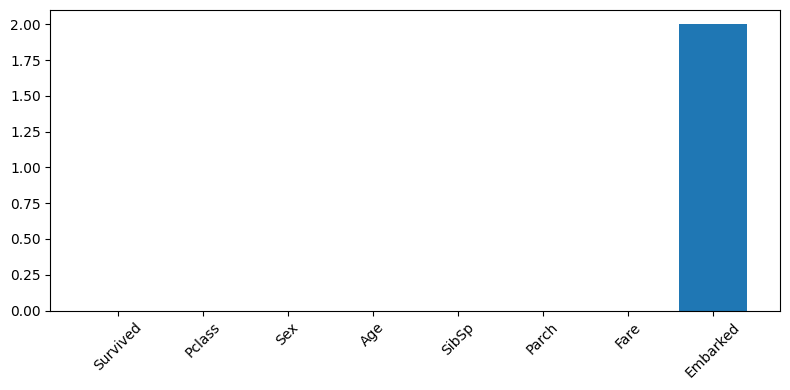

In [6]:
data = data.drop(['Cabin'], axis=1)
data['Age'] = data['Age'].fillna(data['Age'].median())
missing_values = data.isnull().sum()
plt.figure(figsize=(8, 4))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.tight_layout()

In [7]:
for i in data.columns:
  if data[i].dtypes!=object:
    continue
  counter=0
  for j in data[i].unique():
    data[i] = data[i].replace({j:counter})
    counter+=1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].median())
missing_values = data.isnull().sum()
missing_values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

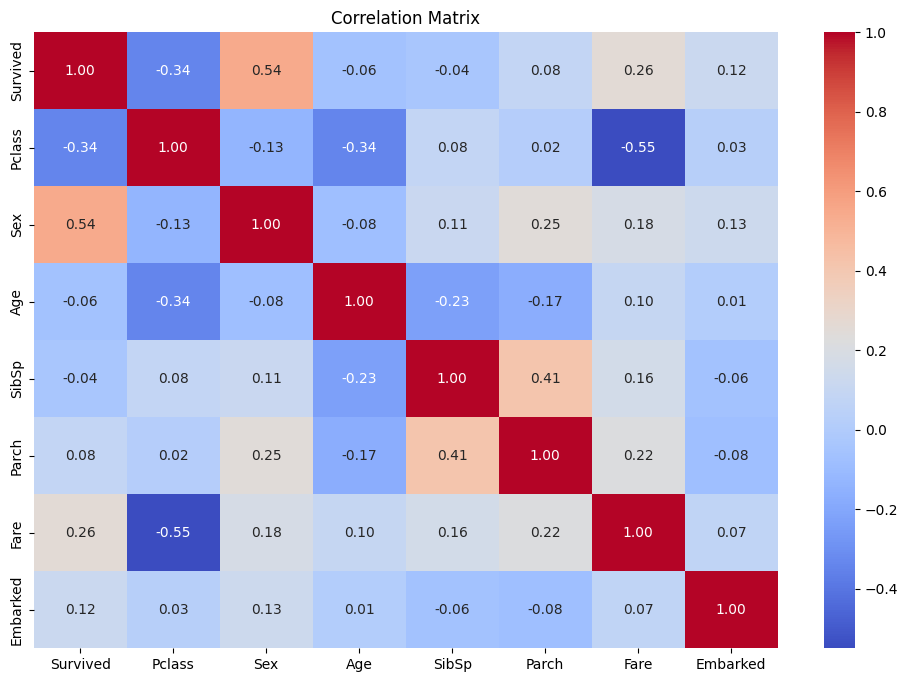

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show() 

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(data.drop(['Survived'], axis=1), data['Survived'])

feature_importance = model.feature_importances_

In [13]:
indices = feature_importance.argsort()
features = [f'{data.columns[i]}' for i in indices]

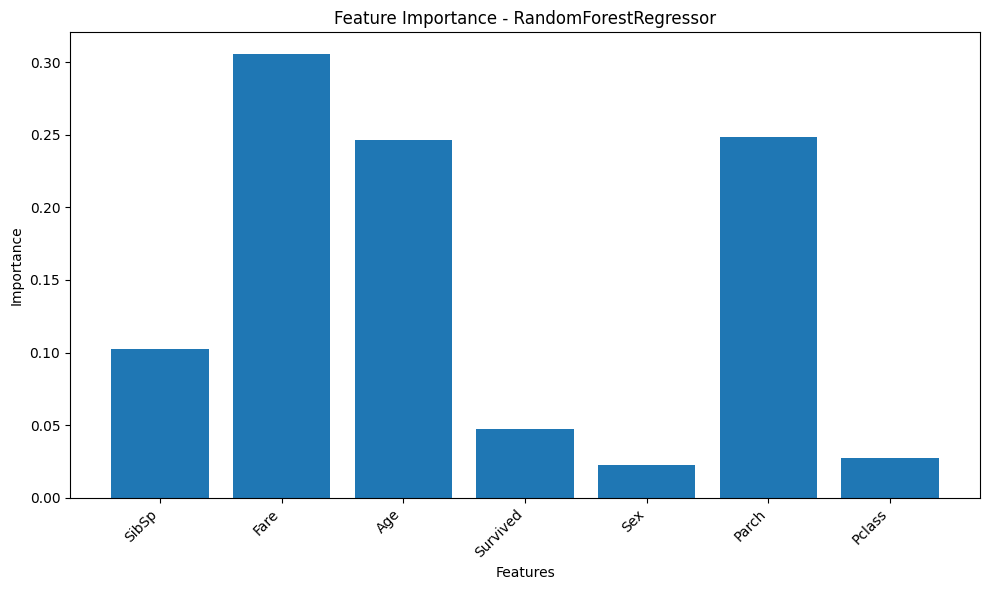

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - RandomForestRegressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [16]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=np.random.randint(100), k_neighbors=5)
x,y = smote.fit_resample(x,y)

In [18]:
y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model1=RandomForestClassifier(n_estimators=50, n_jobs=-1)
model2=AdaBoostClassifier(n_estimators=50)
model3=GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=5, random_state=1)

voting_model = VotingClassifier(estimators=[('rf', model1), ('ada', model2), ('gbc', model3)],voting='hard')
voting_model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     n_jobs=-1)),
                             ('ada', AdaBoostClassifier()),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=5,
                                                         n_estimators=50,
                                                         random_state=1))])

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred=voting_model.predict(x_test)
print("Accuracy score: %.3f"%accuracy_score(y_test,y_pred))
print("Precision score: %.3f"%precision_score(y_test,y_pred, average = 'macro'))
print("Recall score: %.3f"%recall_score(y_test,y_pred, average = 'macro'))

Accuracy score: 0.873
Precision score: 0.872
Recall score: 0.872


In [22]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
ids = test['PassengerId']
test = test.drop(['PassengerId','Name','Ticket'], axis=1)

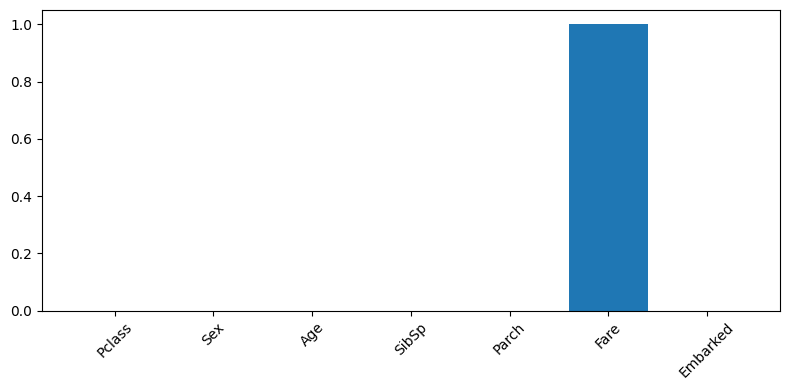

In [25]:
test = test.drop(['Cabin'], axis=1)
test['Age'] = test['Age'].fillna(test['Age'].median())
missing_values = test.isnull().sum()
plt.figure(figsize=(8, 4))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.tight_layout()

In [26]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
missing_values = test.isnull().sum()
missing_values

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
for i in test.columns:
  if test[i].dtypes!=object:
    continue
  counter=0
  for j in test[i].unique():
    test[i] = test[i].replace({j:counter})
    counter+=1

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [29]:
predictions = voting_model.predict(test)

In [30]:
submit = pd.DataFrame()

In [31]:
submit.insert(0, 'PassengerId', ids)
submit.insert(1, 'Survived', predictions)

In [32]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


In [33]:
submit.to_csv('tita_predictions.csv', index=False)